Exploration of the [Federal Reserve Board H15](https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H15), US Interest rates dataset.

In [1]:
import zipfile
from pathlib import Path

import pandas as pd
from lazymyles import download_file

In [2]:
DATA_PATH = Path("data/").resolve()

SOURCE_PATH = DATA_PATH / "source/"
INTERIM_PATH = DATA_PATH / "interim/"
OUTPUT_PATH = DATA_PATH / "output/"

for path in (DATA_PATH, SOURCE_PATH, INTERIM_PATH, OUTPUT_PATH):
    path.mkdir(exist_ok=True)

In [3]:
FRB_H15_FILE_PATH = download_file(
    url="https://www.federalreserve.gov/datadownload/Output.aspx?rel=H15&filetype=zip",
    output_path=SOURCE_PATH,
    file_name="FRB_H15.zip",
)

with zipfile.ZipFile(FRB_H15_FILE_PATH, 'r') as zip_file_obj:
    zip_file_obj.extractall(SOURCE_PATH / "FRB_H15/")

In [4]:
df = pd.read_xml(
    SOURCE_PATH / "FRB_H15/H15_data.xml",
    xpath=".//kf:Series[@SERIES_NAME='RIFSPFF_N.B']/frb:Obs",
    namespaces={
        "frb": "http://www.federalreserve.gov/structure/compact/common",
        "kf": "http://www.federalreserve.gov/structure/compact/H15_H15",
    },
    attrs_only=True,
)
df.head()

,OBS_STATUS,OBS_VALUE,TIME_PERIOD
0,A,1.13,1954-07-01
1,A,1.25,1954-07-02
2,A,0.88,1954-07-05
3,A,0.25,1954-07-06
4,A,1.00,1954-07-07


In [5]:
df = df[df["OBS_VALUE"] > -9998.9]
df.head()

,OBS_STATUS,OBS_VALUE,TIME_PERIOD
0,A,1.13,1954-07-01
1,A,1.25,1954-07-02
2,A,0.88,1954-07-05
3,A,0.25,1954-07-06
4,A,1.00,1954-07-07


In [6]:
df.to_csv(INTERIM_PATH / "us-interest-rates.csv", index=False)

In [7]:
df.rename(
    columns={
        "OBS_STATUS": "status",
        "OBS_VALUE": "value",
        "TIME_PERIOD": "date",
    },
    inplace=True,
)

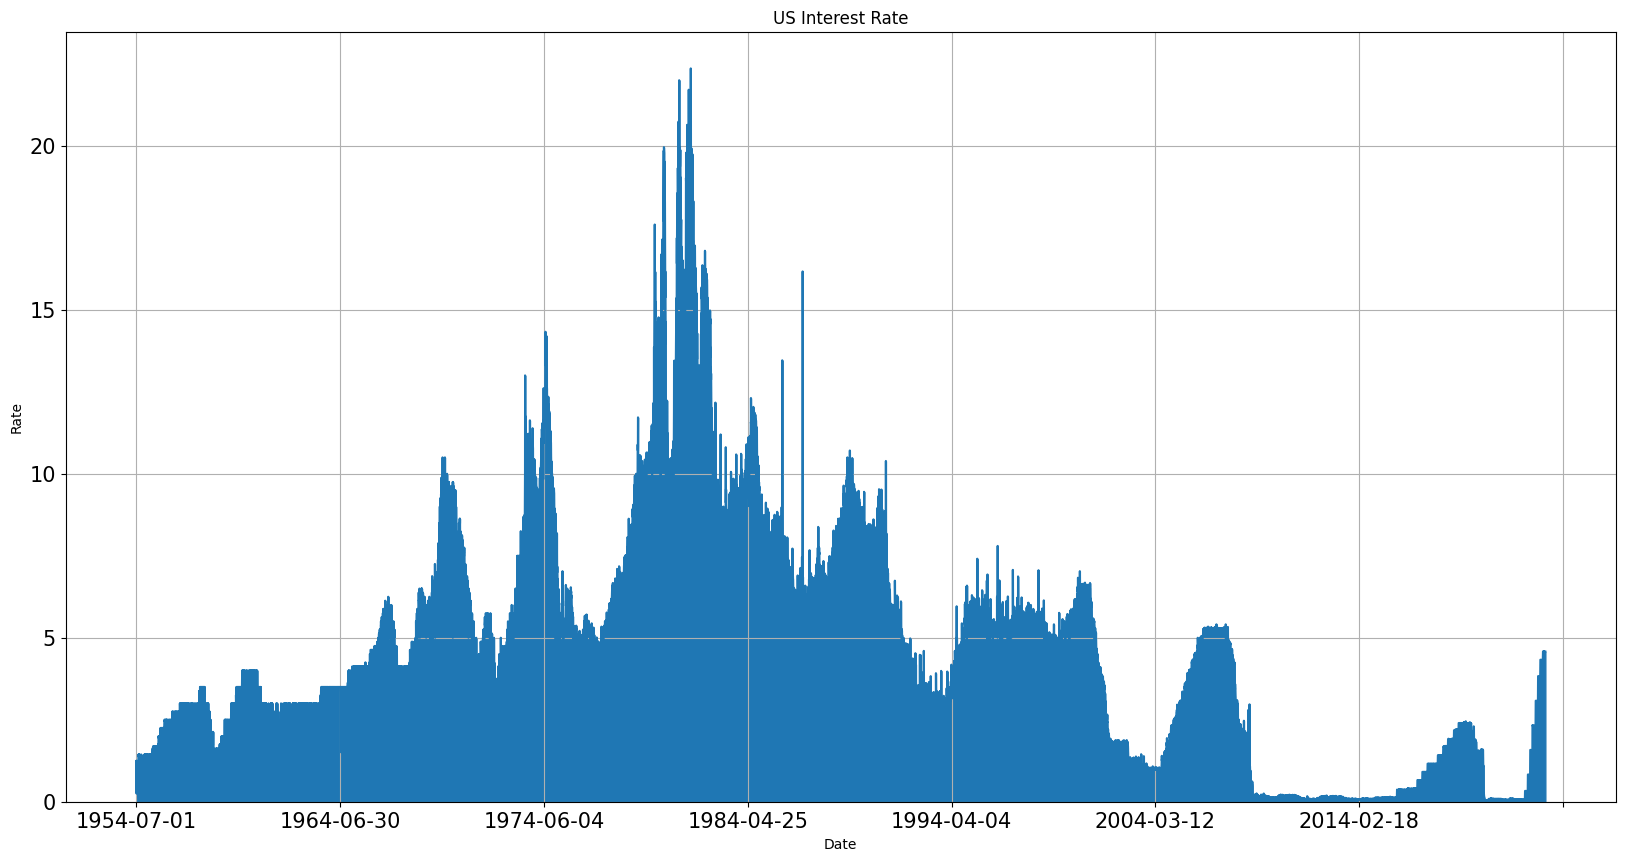

In [8]:
plot = df.plot(
    x="date",
    y="value",
    kind="area",
    figsize=(20, 10),
    title="US Interest Rate",
    grid=True,
    legend=False,
    xlabel="Date",
    ylabel="Rate",
    fontsize=15,
)
plot.get_figure().savefig(OUTPUT_PATH / "plot.png")